# PCA Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

La siguiente celda elimina la columna ID y remueve los registros que tengan las celdas NA

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.drop('ID', axis=1, inplace=True)
df.dropna(axis = 0, inplace = True) # remove empty values
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


Se crea una función para poder la correlación de las variables del dataframe

In [9]:
def generateCorrPlot(df: pd.DataFrame):
    plt.figure(figsize=[20,10])
    sns.heatmap(df.corr(), annot=True)
    plt.show()

Se visualiza la correlación de todas las variables en el dataframe original

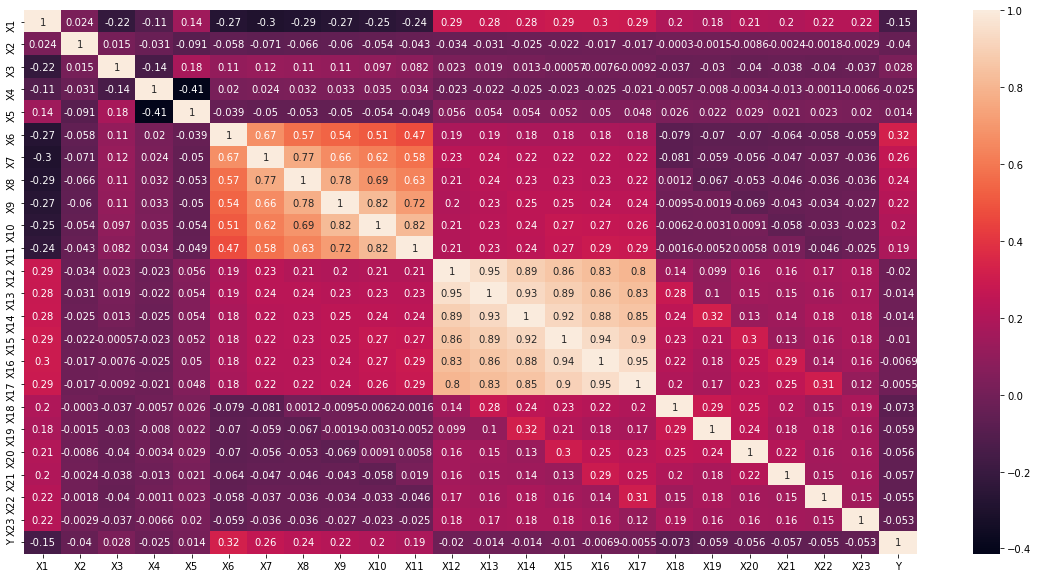

In [10]:
generateCorrPlot(df)

Se defina la función para obtener la varianza total y de cada variable

In [ ]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    for i in data.columns.values.tolist():
        variance = data[i].var()
        print(f'Varianza {i}: {((variance/totalVariance)*100).round(2)}%, value {variance}')

Se eliminar las variables categóricas (cat_columns) y la variable cont_columns contiene las columnas que no sean las de cat_columns

In [37]:
cat_columns = ['X2', 'X3', 'X4', 'Y']
cont_columns = [v for v in df.columns.values.tolist() if v not in (cat_columns)]
print(cont_columns)

['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


Se crea un nuevo dataframe con las columnas presentes en cont_columns

In [38]:
df2 = df[cont_columns].copy()
df2.head()

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Se genera un plot para ver la correlación de las variables continuas en el análisis, se considerarán variables con alto coeficiente de correlación

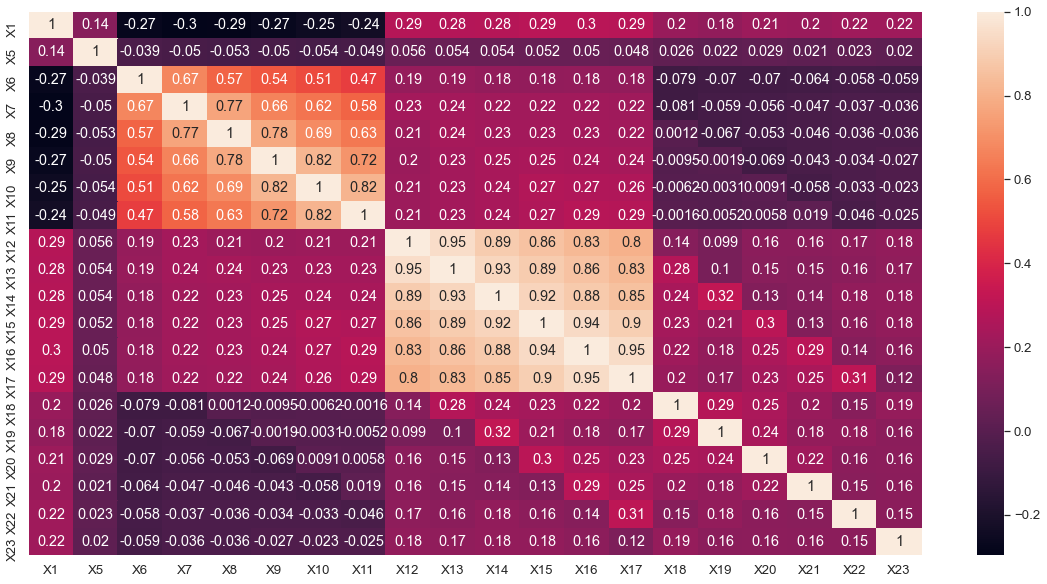

In [39]:
generateCorrPlot(df2)

Se obtiene la varianza de las variables a utilizar, se puede ver que algunas variables tienen una variación muy alta como es el caso de X1, X12 - X17, esto se debe a que los datos son muy grandes por lo que se va a tener que estandarizar el dataframe.

In [40]:
getVarianceInfo(df2)

Total variance 45450192701.38758
Varianza X1: 37.03%, value 16831766774.586897
Varianza X5: 0.0%, value 84.90367152819495
Varianza X6: 0.0%, value 1.263351316939665
Varianza X7: 0.0%, value 1.4332178066846333
Varianza X8: 0.0%, value 1.4304781197352285
Varianza X9: 0.0%, value 1.3652024674848207
Varianza X10: 0.0%, value 1.282118127466326
Varianza X11: 0.0%, value 1.320896401427155
Varianza X12: 11.94%, value 5427998249.17222
Varianza X13: 11.16%, value 5071039668.863469
Varianza X14: 10.59%, value 4814311993.299579
Varianza X15: 9.12%, value 4142812591.0275044
Varianza X16: 8.14%, value 3699828957.4625015
Varianza X17: 7.81%, value 3550119982.5176053
Varianza X18: 0.6%, value 274525912.78464437
Varianza X19: 1.17%, value 531578391.9148982
Varianza X20: 0.68%, value 310370604.0924965
Varianza X21: 0.54%, value 245743419.31487602
Varianza X22: 0.51%, value 233648119.87777698
Varianza X23: 0.7%, value 316447943.47417647


Se estandarizan los datos y se crea un nuevo dataframe removiendo la media y volviendo unidad la varianza para que cada variable contribuya de igual manera al análisis.

In [43]:
# Escalando los datos
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
#getVarianceInfo(df3)

In [48]:
getVarianceInfo(df3)

Total variance 20.000667623593394
Varianza X1: 5.0%, value 1.0000333811798554
Varianza X5: 5.0%, value 1.000033381179615
Varianza X6: 5.0%, value 1.0000333811792075
Varianza X7: 5.0%, value 1.0000333811796651
Varianza X8: 5.0%, value 1.000033381179698
Varianza X9: 5.0%, value 1.000033381179792
Varianza X10: 5.0%, value 1.0000333811793714
Varianza X11: 5.0%, value 1.0000333811800377
Varianza X12: 5.0%, value 1.0000333811796838
Varianza X13: 5.0%, value 1.000033381179713
Varianza X14: 5.0%, value 1.0000333811796398
Varianza X15: 5.0%, value 1.000033381179612
Varianza X16: 5.0%, value 1.0000333811797524
Varianza X17: 5.0%, value 1.0000333811797395
Varianza X18: 5.0%, value 1.0000333811797215
Varianza X19: 5.0%, value 1.0000333811797237
Varianza X20: 5.0%, value 1.000033381179616
Varianza X21: 5.0%, value 1.0000333811797693
Varianza X22: 5.0%, value 1.0000333811795206
Varianza X23: 5.0%, value 1.0000333811796582


Se declara el objeto de PCA y se ajusta con los adtos del dataframe a analizar

In [45]:
pcs = PCA()
components = pcs.fit_transform(df3)
components.shape

(29958, 20)

Se genera un plot para mostrar el porcentaje de varianza de cada componente, se puede ver que con las primeras 10 componentes se obtiene una pérdida de información del 10%.

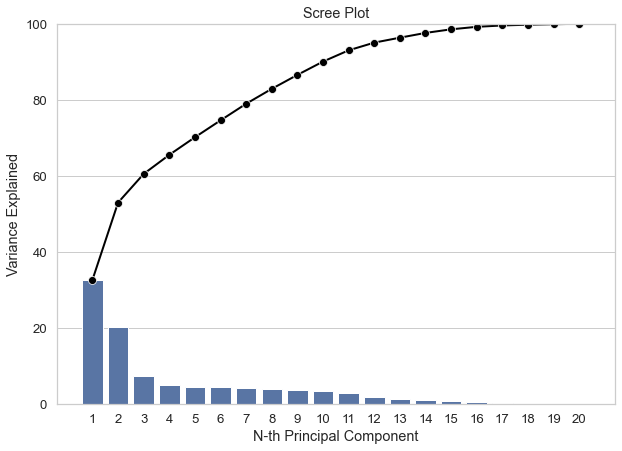

In [46]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_*100, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_)*100, 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 100)
plt.show()

Se conserva la variación total que con los datos escalados, sin embargo los datos se distribuyeron de manera diferente.

In [50]:
pcs_df = pd.DataFrame(components, columns = PC_components)
getVarianceInfo(pcs_df)

Total variance 20.00066762359382
Varianza 1: 32.69%, value 6.539106793594508
Varianza 2: 20.31%, value 4.061888695111145
Varianza 3: 7.54%, value 1.5084339068657002
Varianza 4: 5.01%, value 1.0026809305865978
Varianza 5: 4.62%, value 0.9232104951110685
Varianza 6: 4.44%, value 0.888269376339127
Varianza 7: 4.37%, value 0.8738804078052188
Varianza 8: 3.92%, value 0.7837819465290792
Varianza 9: 3.66%, value 0.7327528548004457
Varianza 10: 3.5%, value 0.700033727659096
Varianza 11: 2.96%, value 0.5915684327101632
Varianza 12: 2.02%, value 0.40441766180851557
Varianza 13: 1.3%, value 0.2598719635017848
Varianza 14: 1.25%, value 0.25050973712388924
Varianza 15: 0.94%, value 0.18887028443225756
Varianza 16: 0.66%, value 0.13191850176327205
Varianza 17: 0.35%, value 0.07016281759330549
Varianza 18: 0.2%, value 0.04078966630521648
Varianza 19: 0.13%, value 0.025292013821415268
Varianza 20: 0.12%, value 0.02322741013201721


¿Cuál es el número de componentes mínimo y por qué?

¿Cuál es la variación de los datos que representan esos componentes?

¿Cuál es la pérdida de información después de realizar PCA?

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?